# Data Augmentation
- Data Augmentation is a technique where we can generate a artifical data for trainning the deep learning model b/c deep learning model is data hungry.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image
import cv2
import os

# Load the image

In [9]:
def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224,224))

    img_array = np.array(img)
    return img,img_array

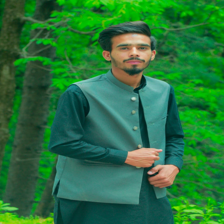

In [10]:
img,img_array = load_image('/content/sami.jpg')
img

array([[[  0,  67,  14],
        [  0,  78,  13],
        [  0,  91,  21],
        ...,
        [ 37, 124,  57],
        [ 36, 128,  61],
        [ 28, 128,  59]],

       [[  0,  68,  11],
        [  2,  80,  16],
        [  1,  93,  28],
        ...,
        [ 13, 118,  50],
        [  7, 122,  50],
        [  5, 121,  50]],

       [[  0,  59,  14],
        [  2,  75,  21],
        [  2,  91,  30],
        ...,
        [  0, 118,  44],
        [  0, 115,  48],
        [  0, 115,  46]],

       ...,

       [[108, 203,   2],
        [113, 203,   7],
        [ 92, 204,   2],
        ...,
        [ 32, 180,   0],
        [ 26, 178,   0],
        [ 26, 182,   1]],

       [[172, 203,  67],
        [177, 201,  64],
        [158, 197,  19],
        ...,
        [ 47, 189,  12],
        [ 55, 184,   6],
        [ 31, 165,   0]],

       [[173, 202, 120],
        [179, 203,  93],
        [161, 198,  41],
        ...,
        [ 77, 193,  35],
        [ 65, 183,  12],
        [ 25, 157,   6]]], dtype=uint8)
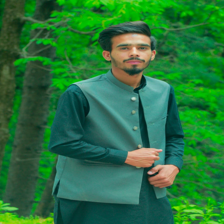

In [11]:
img_array

In [12]:
# Apply transformation
def transform_img(img):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.RandomCrop(size = (224,224),padding = 5),
        transforms.RandomRotation(degrees = 45),
        transforms.RandomHorizontalFlip(p = 0.5),
        transforms.RandomVerticalFlip(p = 0.05),
    ])

    img_transformed = transform(img)
    return img_transformed

In [13]:
transform_img(img_array)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

# Visulize Transform Images

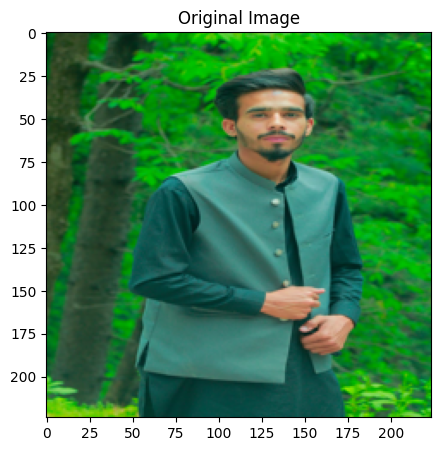

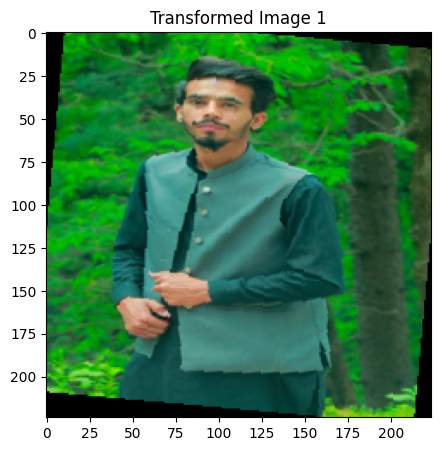

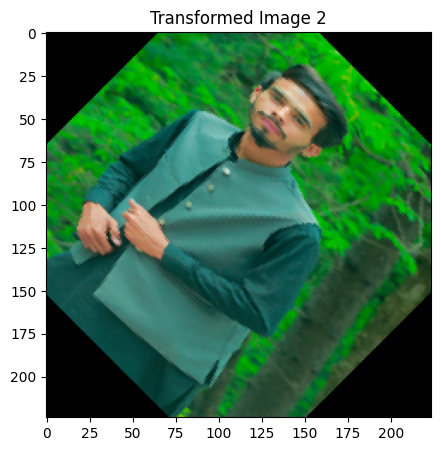

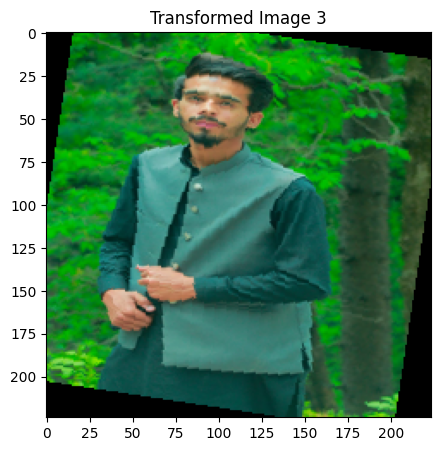

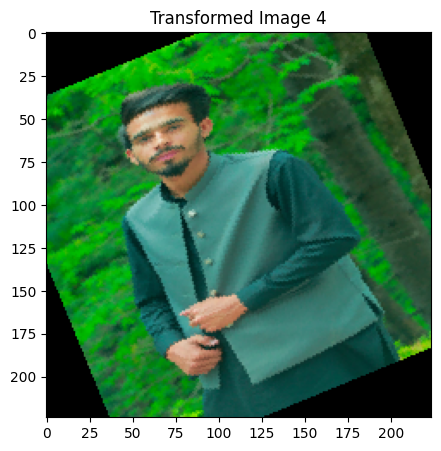

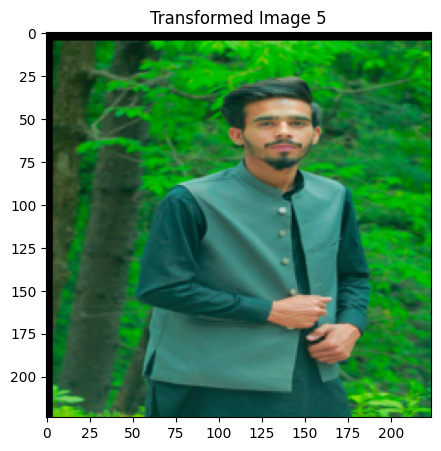

In [14]:
# Display the original image
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title("Original Image")
plt.show()

# Transform and display the image multiple times to see variations
for i in range(5):  # Display 5 transformed images
    transformed_image = transform_img(img_array)
    plt.figure(figsize=(5,5))
    plt.imshow(transforms.ToPILImage()(transformed_image)) # Convert tensor back to PIL Image for display
    plt.title(f"Transformed Image {i+1}")
    plt.show()